In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
from scipy import stats
import statsmodels.api as sm
%matplotlib

C:\Users\Duarte\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Using matplotlib backend: Qt5Agg


# Projeto 3 - Prevedor de Rating

**Omar Afrange Neto**

## Introdução

### Objetivo

O Objetivo desse arquivo é poder prever o rating de um aplicativo, a partir da categoria, dos reviews, do tamanho dele, quantidade de instalações, se é pago ou não e content rating.

In [2]:
dados = pd.read_csv("google.csv")
dados.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# Limpando e convertendo o DataFrame:

In [3]:
def converte_numero(x):
    try:
        mult = x[-1]
        if mult == 'M':
            val = float(x[:-1]) * 1e6
        elif mult == 'k':
            val = float(x[:-1]) * 1e3
        else:
            val = float(x)
        return val
    except Exception as e:
        return 0

dados['size_num'] = dados['Size'].apply(converte_numero)

In [4]:
dados['Installs'].value_counts()

dados['Installs_num'] = dados['Installs'].replace(['1,000,000+','10,000,000+','100,000+','10,000+','5,000,000+','1,000+','500,000+','50,000+','5,000+','100,000,000+','100+','50,000,000+','500+','500,000,000+','10+','1,000,000,000+','50+','5+','1+'],[1000000,10000000,100000,10000,5000000,1000,500000,50000,5000,100000000,100,50000000,500,500000000,10,1000000000,50,5,1])


In [5]:
def dummify(data, column_name):
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2
dados = dummify(dados, "Category")
#categorias separadas
index1 = [ 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER']


In [6]:
dados = dummify(dados, "Content Rating")
dados.columns
#categorias separadas
index2 = ['Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated']



In [7]:
dados = dados.replace(['Free','Paid'],[0, 1])

dados = dados.dropna()

In [8]:
teste = dados.loc[:,['Rating','Genres']]
teste_final = teste.set_index('Rating')
teste_final

,Genres
Rating,
4.1,Art & Design
3.9,Art & Design;Pretend Play
4.7,Art & Design
4.5,Art & Design
4.3,Art & Design;Creativity
4.4,Art & Design
3.8,Art & Design
4.1,Art & Design
4.4,Art & Design


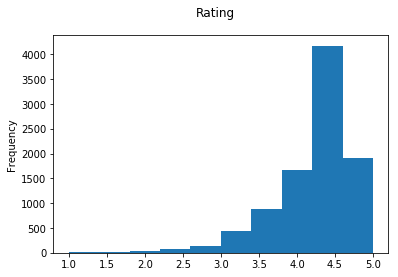

In [9]:
dados['Rating'].plot.hist()
plt.suptitle("Rating");

In [10]:
dados.corr()

,Rating,size_num,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Rating,1.000000,0.045700,NaN,0.029114,-0.000245,0.011302,0.041678,-0.024987,-0.005619,-0.012317,...,-0.081825,-0.025201,-0.032784,0.009099,0.003759,-0.020328,0.026690,-0.030220,0.029256,-0.001842
size_num,0.045700,1.000000,NaN,-0.023399,-0.001397,-0.015419,-0.044247,-0.054406,-0.026884,-0.090564,...,-0.149347,-0.007384,-0.041446,-0.038412,-0.002842,-0.168679,0.125035,0.025882,0.118004,-0.005637
Category_1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ART_AND_DESIGN,0.029114,-0.023399,NaN,1.000000,-0.007181,-0.005438,-0.011277,-0.014814,-0.006395,-0.015434,...,-0.023609,-0.012740,-0.010681,-0.007279,-0.001450,0.028407,-0.010457,-0.018434,-0.016865,-0.000837
Category_AUTO_AND_VEHICLES,-0.000245,-0.001397,NaN,-0.007181,1.000000,-0.005952,-0.012344,-0.016216,-0.007001,-0.016895,...,-0.025843,-0.013946,-0.011692,-0.007968,-0.001588,0.039437,-0.012633,-0.020179,-0.028292,-0.000916
Category_BEAUTY,0.011302,-0.015419,NaN,-0.005438,-0.005952,1.000000,-0.009348,-0.012280,-0.005301,-0.012794,...,-0.019570,-0.010561,-0.008854,-0.006034,-0.001202,0.022579,-0.014130,-0.007894,-0.014307,-0.000694
Category_BOOKS_AND_REFERENCE,0.041678,-0.044247,NaN,-0.011277,-0.012344,-0.009348,1.000000,-0.025467,-0.010994,-0.026533,...,-0.040585,-0.021901,-0.018361,-0.012514,-0.002493,0.017362,-0.009896,-0.020846,-0.001502,-0.001439
Category_BUSINESS,-0.024987,-0.054406,NaN,-0.014814,-0.016216,-0.012280,-0.025467,1.000000,-0.014443,-0.034856,...,-0.053315,-0.028771,-0.024121,-0.016439,-0.003275,0.087757,-0.038494,-0.041630,-0.058651,-0.001891
Category_COMICS,-0.005619,-0.026884,NaN,-0.006395,-0.007001,-0.005301,-0.010994,-0.014443,1.000000,-0.015048,...,-0.023017,-0.012421,-0.010413,-0.007097,0.150702,-0.070256,-0.003108,0.026068,0.065021,-0.000816
Category_COMMUNICATION,-0.012317,-0.090564,NaN,-0.015434,-0.016895,-0.012794,-0.026533,-0.034856,-0.015048,1.000000,...,-0.055548,-0.029976,-0.025131,-0.017127,-0.003412,0.050386,-0.040106,-0.019210,-0.025394,-0.001970


In [11]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [31]:
y = dados['Rating']
x = dados[['Reviews','Type',"size_num",'Installs_num','Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER','Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated' ]]

## Regressão Linear

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
print("Acurácia: {}".format(1 - mean_squared_error(y_pred,y_test) / np.var(y_test)))

Acurácia: 0.034812060025767866


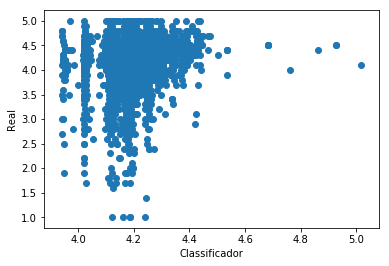

In [49]:
plt.scatter(y_pred,y_test)
plt.xlabel('Classificador')
plt.ylabel('Real')
plt.show()

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = np.int(y_pred)

In [51]:
print("Acurácia: {}".format(1 - mean_squared_error(y_pred,y_test) / np.var(y_test)))

Acurácia: 0.08854817196247966


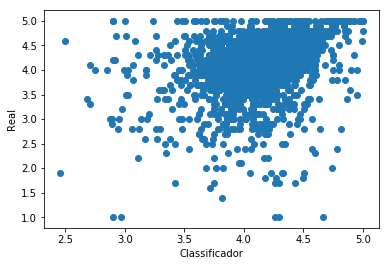

In [52]:
plt.scatter(y_pred,y_test)
plt.xlabel('Classificador')
plt.ylabel('Real')
plt.show()

# Conclusão 

Os dados que utilizamos são bem abrangentes, porém, a acurácia em ambos os métodos foi relativamente baixa. Uma possível causa para essa performance, é a de que o modelo conta concentração dos dados da categoria Review, em nota 4.5, como podemos ver no histograma da variável. Assim, o modelo consegue classificar muito bem para essa nota, e mal para as outras notas. Podemos observar também, uma melhora de performance ao usar o método random forest, porque utilizamos muitos dados diferente, e o método de regressão linear, que usa uma reta para aproximar os pontos, não consegue ajustar um modelo tão complexo. 